In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(f"tf.__version__ = {tf.__version__}")

tf.__version__ = 2.1.0


In [2]:
NUM_CLASSES = 10
NUM_EPOCHS = 5
BATCH_SIZE = 64

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
train_images  = train_images / 255.0
train_images = np.expand_dims(train_images, axis=-1)
print(f"train_images.shape = {train_images.shape}, train_labels.shape = {train_labels.shape}")

test_images = test_images / 255.0
test_images = np.expand_dims(test_images, axis=-1)
print(f"test_images.shape = {test_images.shape}, test_labels.shape = {test_labels.shape}")

train_images.shape = (60000, 28, 28, 1), train_labels.shape = (60000,)
test_images.shape = (10000, 28, 28, 1), test_labels.shape = (10000,)


In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dense(NUM_CLASSES, activation=tf.nn.softmax)
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
optimizer = tf.optimizers.Adam()
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.fit(train_images, train_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4751 - accuracy: 0.8277
Epoch 2/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3146 - accuracy: 0.8849
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2687 - accuracy: 0.9017
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2372 - accuracy: 0.9132
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2129 - accuracy: 0.9218


In [9]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 86us/sample - loss: 0.2655 - accuracy: 0.9015


[0.2655043403506279, 0.9015]

In [10]:
test_image = test_images[0]
prediction = model.predict(np.expand_dims(test_image, axis=0))
print(prediction[0])
print(np.argmax(prediction[0]))

[2.1172028e-07 5.0873643e-07 5.8790550e-09 6.9711179e-09 2.3608269e-09
 6.4354501e-04 2.1788248e-08 2.6248660e-04 5.0087647e-07 9.9909270e-01]
9


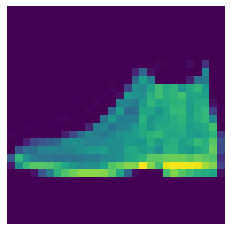

In [11]:
plt.figure()
plt.imshow(np.squeeze(test_image))
plt.axis('off')
plt.show()

In [12]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

def visualize_activation(image, channel=0):
    a = activation_model.predict(image.reshape(1, 28, 28, 1))
    plt.figure(figsize=(16, 4))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(a[i][0, :, :, channel], cmap='inferno')

label = 6


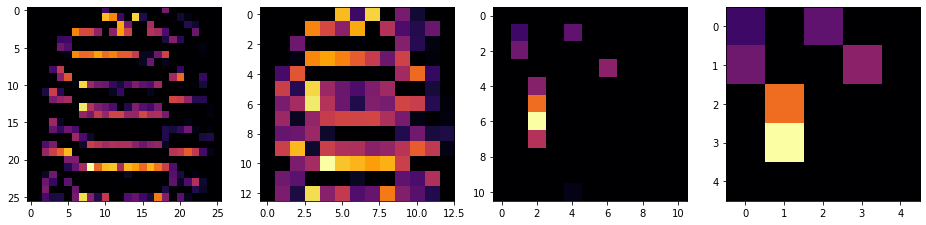

In [13]:
image_idx = 7
image = test_images[image_idx]
print(f"label = {test_labels[image_idx]}")
visualize_activation(image)